<a href="https://colab.research.google.com/github/MichealOmojola/Neptune-AI-Projects/blob/main/machine_learning/neptune_ai/Micheal_UCI_Heart_Disease_neptune_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data Source Link:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

CSV Formatted Dataset:
https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

The dataset has 14 key attributes out of original 76, from the dataset along with their descriptions:

- age: The person’s age in years
- sex: The person’s sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical - angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person’s resting blood pressure
- chol: The person’s cholesterol measurement in mg/dl
- fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
- thalach: The person’s maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0–3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

Note: Make sure you have download the dataset from Kaggle link first.

- Now we will upload the heart.csv from local file system to Google colab
server.
- You can also use pandas to upload the file from local file system also
  - df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))


In [113]:
# from google.colab import files
# uploaded = files.upload()

In [114]:
!pip install neptune-client neptune-tensorflow-keras

In [115]:
!pip install neptune-notebooks

In [116]:
!jupyter nbextension enable --py neptune-notebooks

Enabling notebook extension neptune-notebooks/neptune-notebook...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [117]:
!pip show neptune-client

Name: neptune-client
Version: 1.8.6
Summary: Neptune Client
Home-page: https://neptune.ai/
Author: neptune.ai
Author-email: contact@neptune.ai
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: boto3, bravado, click, future, GitPython, oauthlib, packaging, pandas, Pillow, psutil, PyJWT, requests, requests-oauthlib, six, swagger-spec-validator, urllib3, websocket-client
Required-by: neptune-notebooks


In [118]:
!pip show neptune-tensorflow-keras

Name: neptune-tensorflow-keras
Version: 2.2.0
Summary: Neptune.ai tensorflow-keras integration library
Home-page: https://neptune.ai/
Author: neptune.ai
Author-email: contact@neptune.ai
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: tensorflow
Required-by: 


In [119]:
# !ls -l

In [120]:
# import neptune.new as neptune
# from neptune.new.integrations.tensorflow_keras import NeptuneCallback

In [121]:
import neptune
from neptune.integrations.tensorflow_keras import NeptuneCallback

In [122]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

In [123]:
run = neptune.init_run(
    project="micheal1234/Keras-heart-disease",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3ZmRlZGMyOS1kNmUyLTQwN2YtYTEyNi01ZDJmODAxZTA3NjYifQ==",
)  # your credentials

https://app.neptune.ai/micheal1234/Keras-heart-disease/e/KHD-4


In [124]:
model = neptune.init_model(
    name="Prediction model",
    key="MOD",
    project="micheal1234/Keras-heart-disease",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3ZmRlZGMyOS1kNmUyLTQwN2YtYTEyNi01ZDJmODAxZTA3NjYifQ==", # your credentials
)

NeptuneModelKeyAlreadyExistsError: 
[95m
----NeptuneModelKeyAlreadyExistsError---------------------------------------------------
[0m
A model with the provided key (MOD) already exists in this project.

You can check all of your models in the Models section of the project:
https://app.neptune.ai/micheal1234/Keras-heart-disease/models

Note: If there is a model with the same key in the trash, you need to delete the model from the trash to make the key
available again.

[92mNeed help?[0m-> https://docs.neptune.ai/getting_help


In [125]:
model_version = neptune.init_model_version(
    model="KHD-MOD",
    project="micheal1234/Keras-heart-disease",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3ZmRlZGMyOS1kNmUyLTQwN2YtYTEyNi01ZDJmODAxZTA3NjYifQ==", # your credentials
)

https://app.neptune.ai/micheal1234/Keras-heart-disease/m/KHD-MOD/v/KHD-MOD-3


In [126]:
import io
df = pd.read_csv('heart.csv')

In [127]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [128]:
df.shape

(303, 14)

In [129]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<ipython-input-130-57c137459730>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(['Heart disease - Yes', 'Heart Disease - No'])


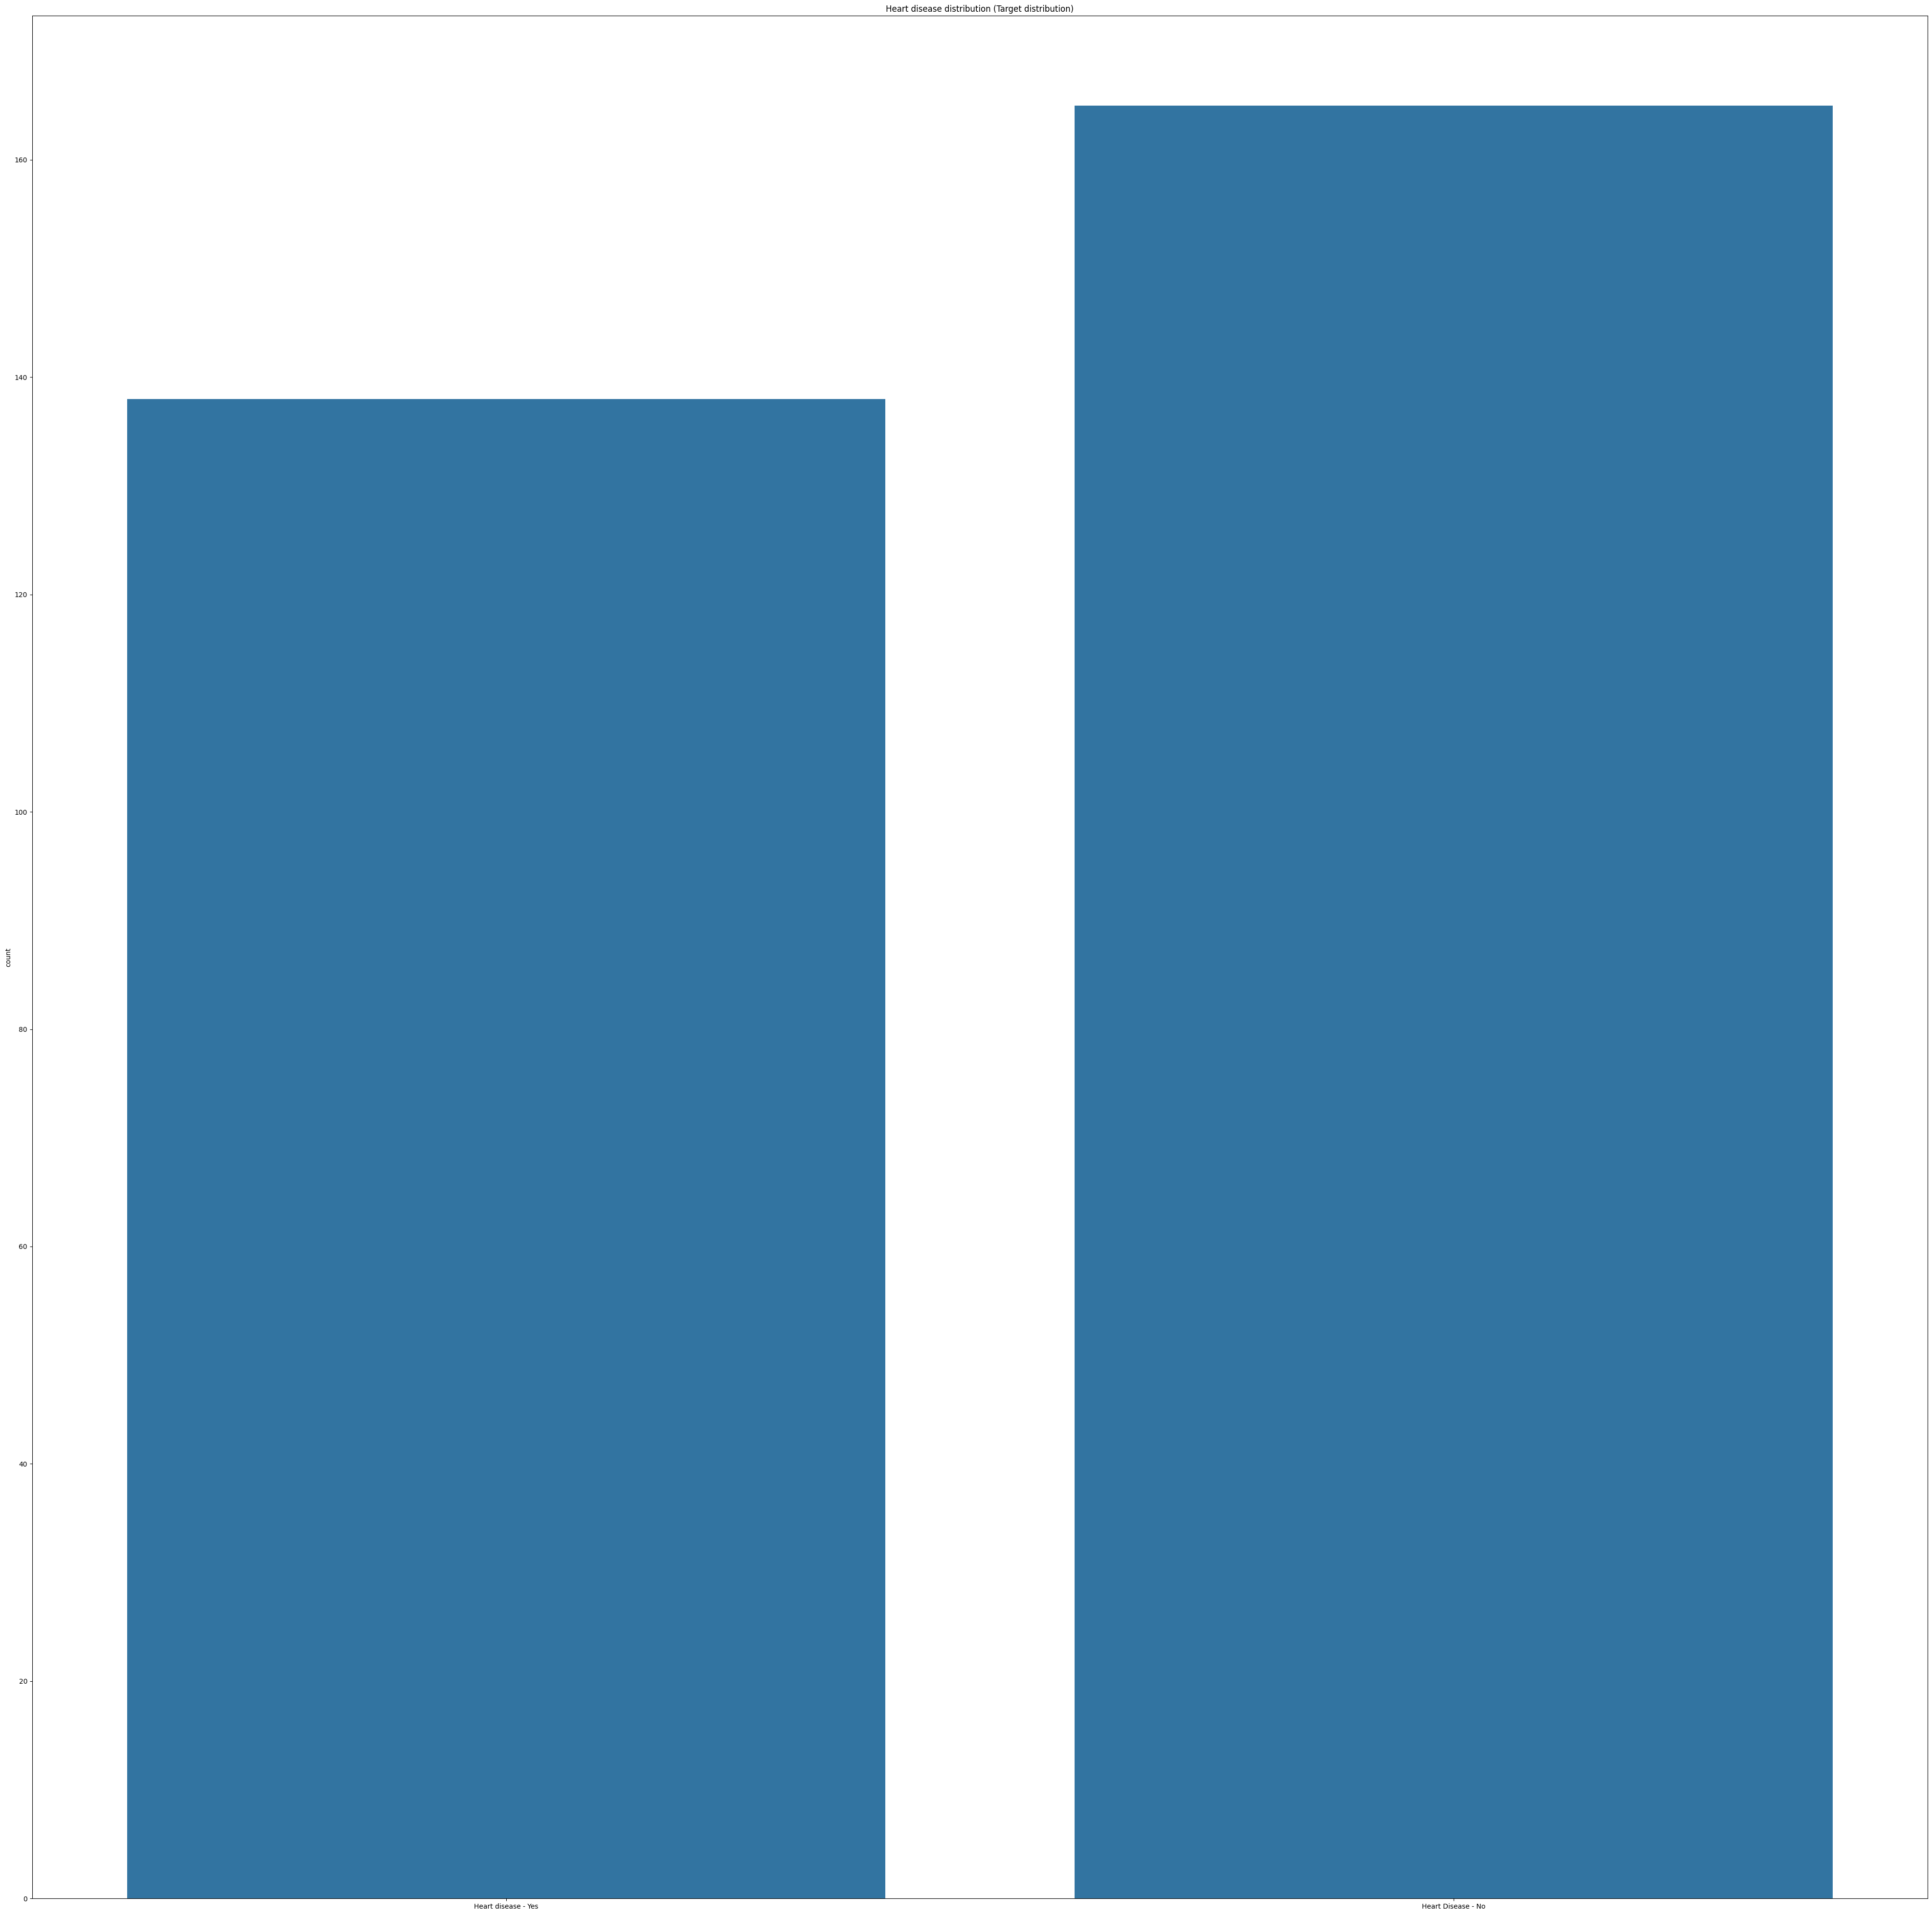

In [130]:
f = sns.countplot(x='target', data=df)
f.set_title("Heart disease distribution (Target distribution)")
f.set_xticklabels(['Heart disease - Yes', 'Heart Disease - No'])
plt.xlabel("");

<ipython-input-131-316d3cfac918>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(['Heart disease - Yes', 'Heart Disease - No'])


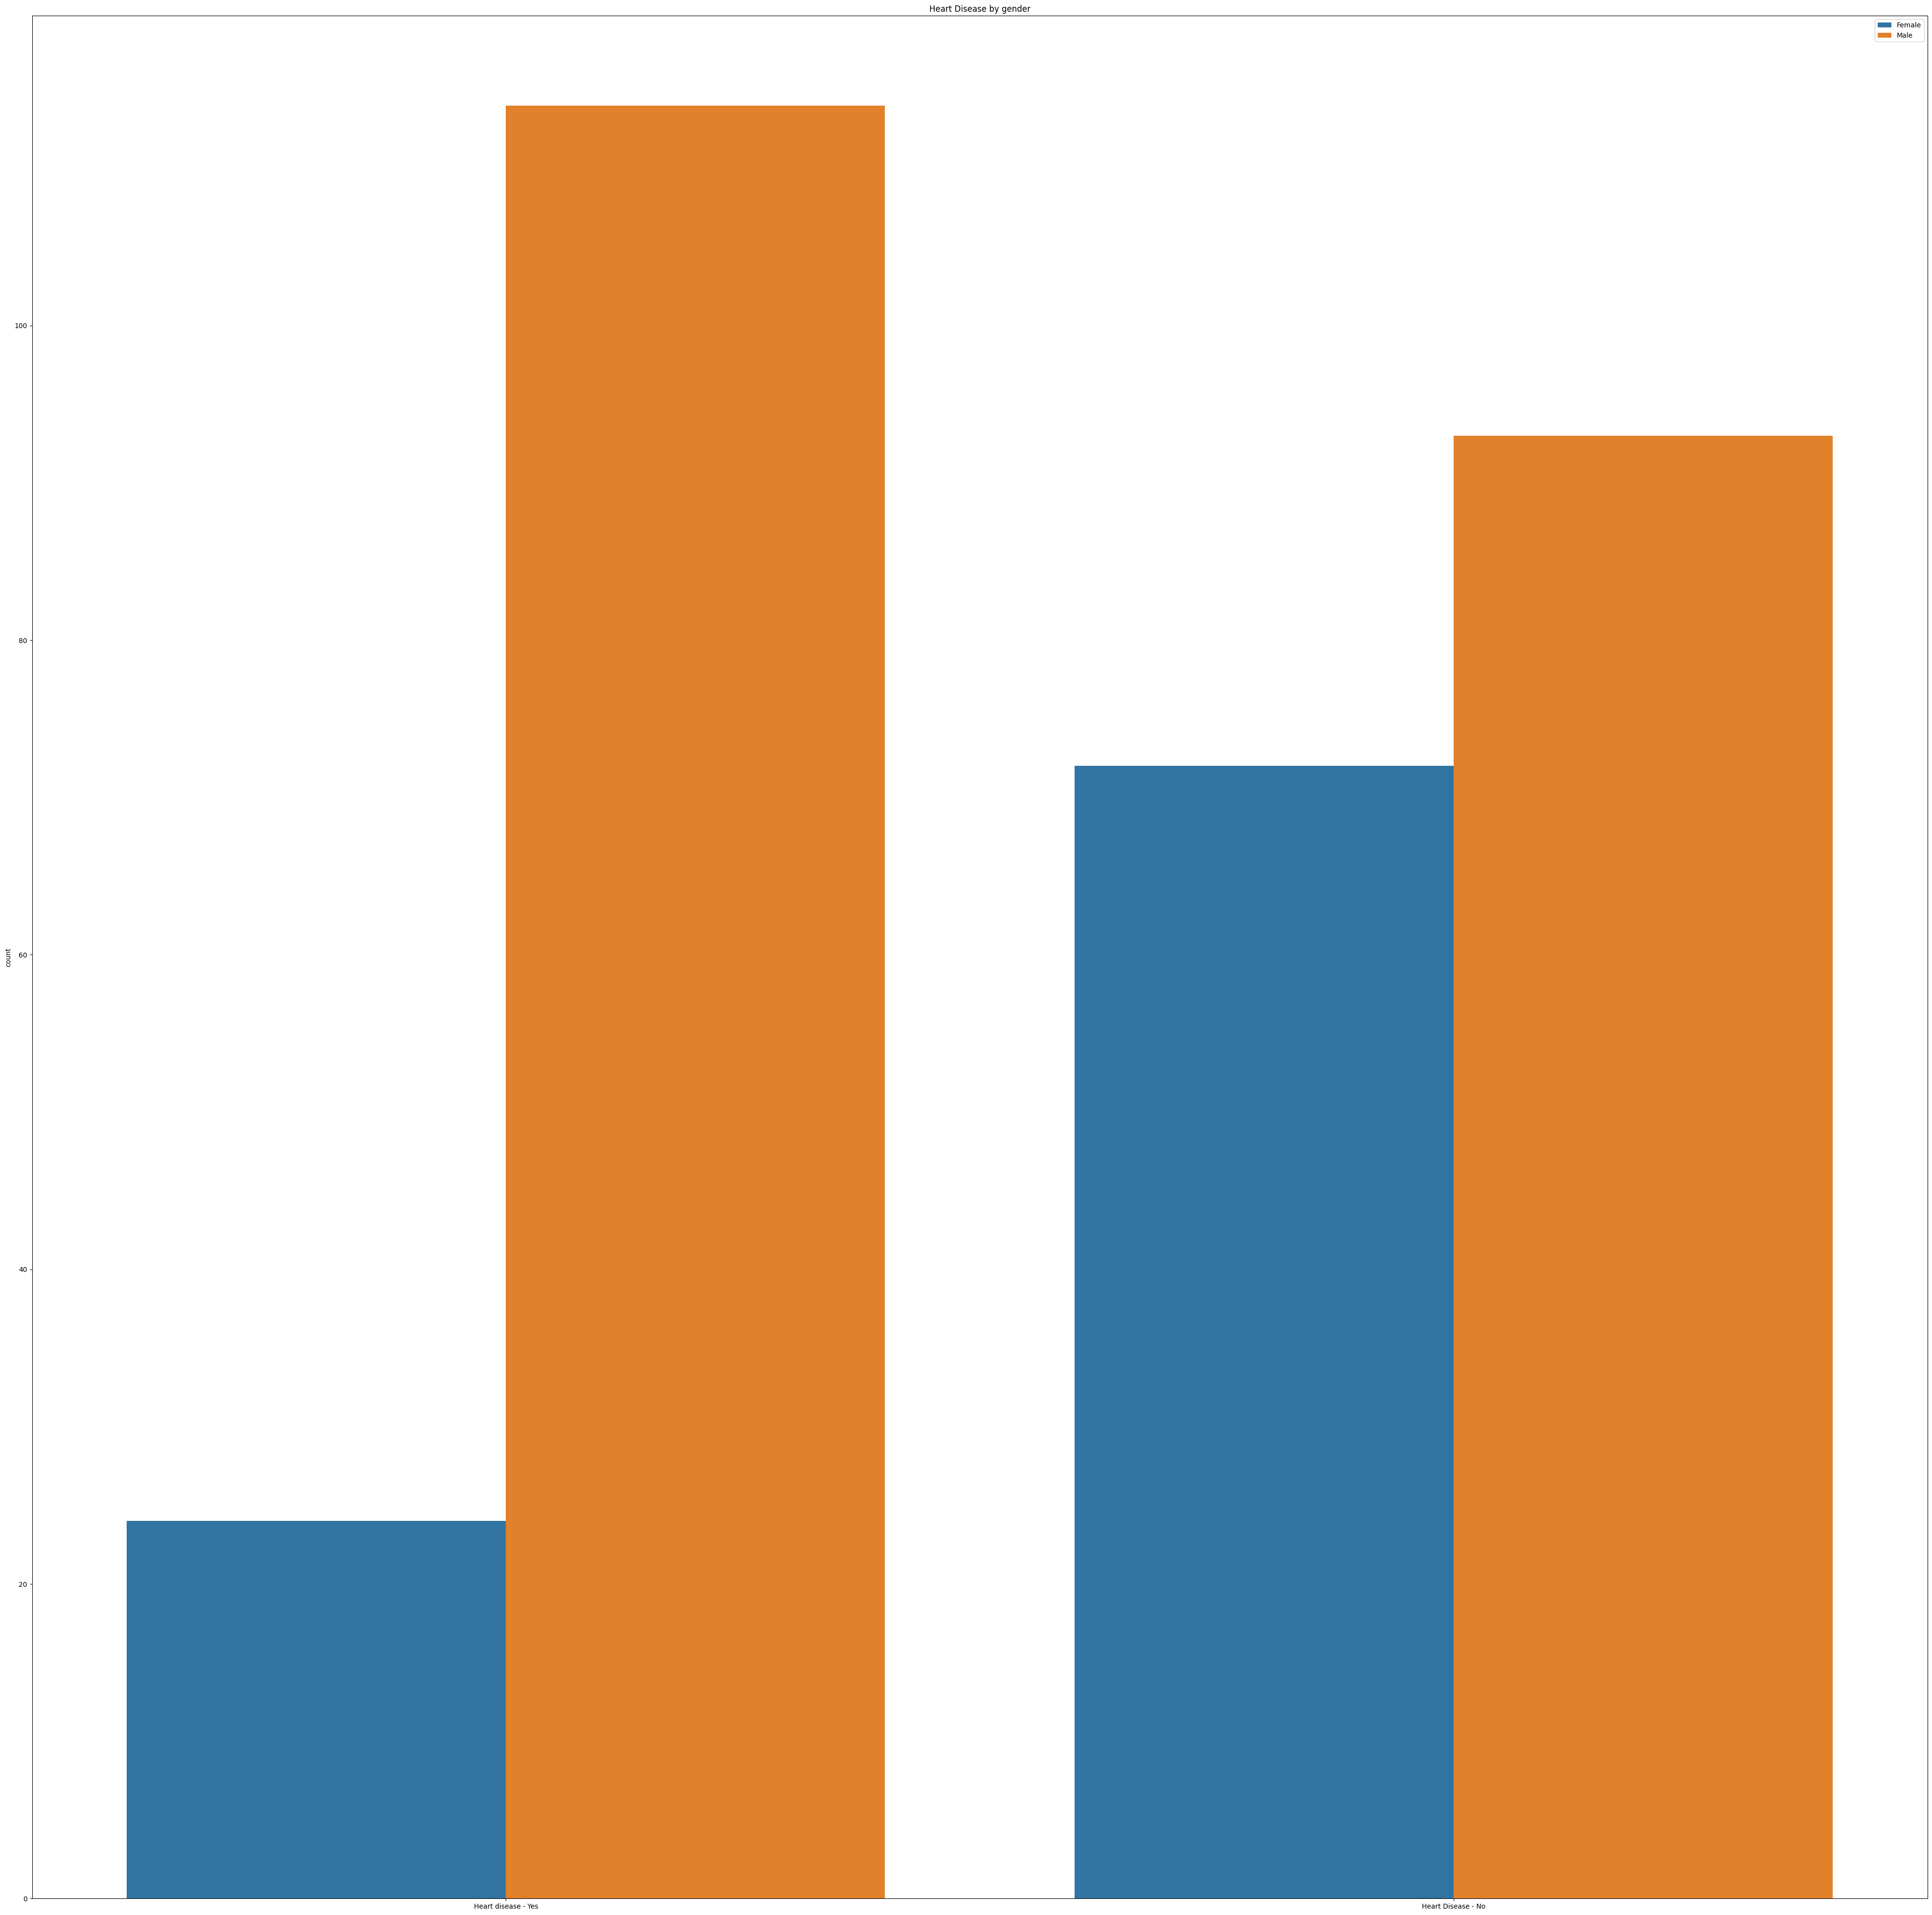

In [131]:
f = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart Disease by gender")
f.set_xticklabels(['Heart disease - Yes', 'Heart Disease - No'])
plt.xlabel("");

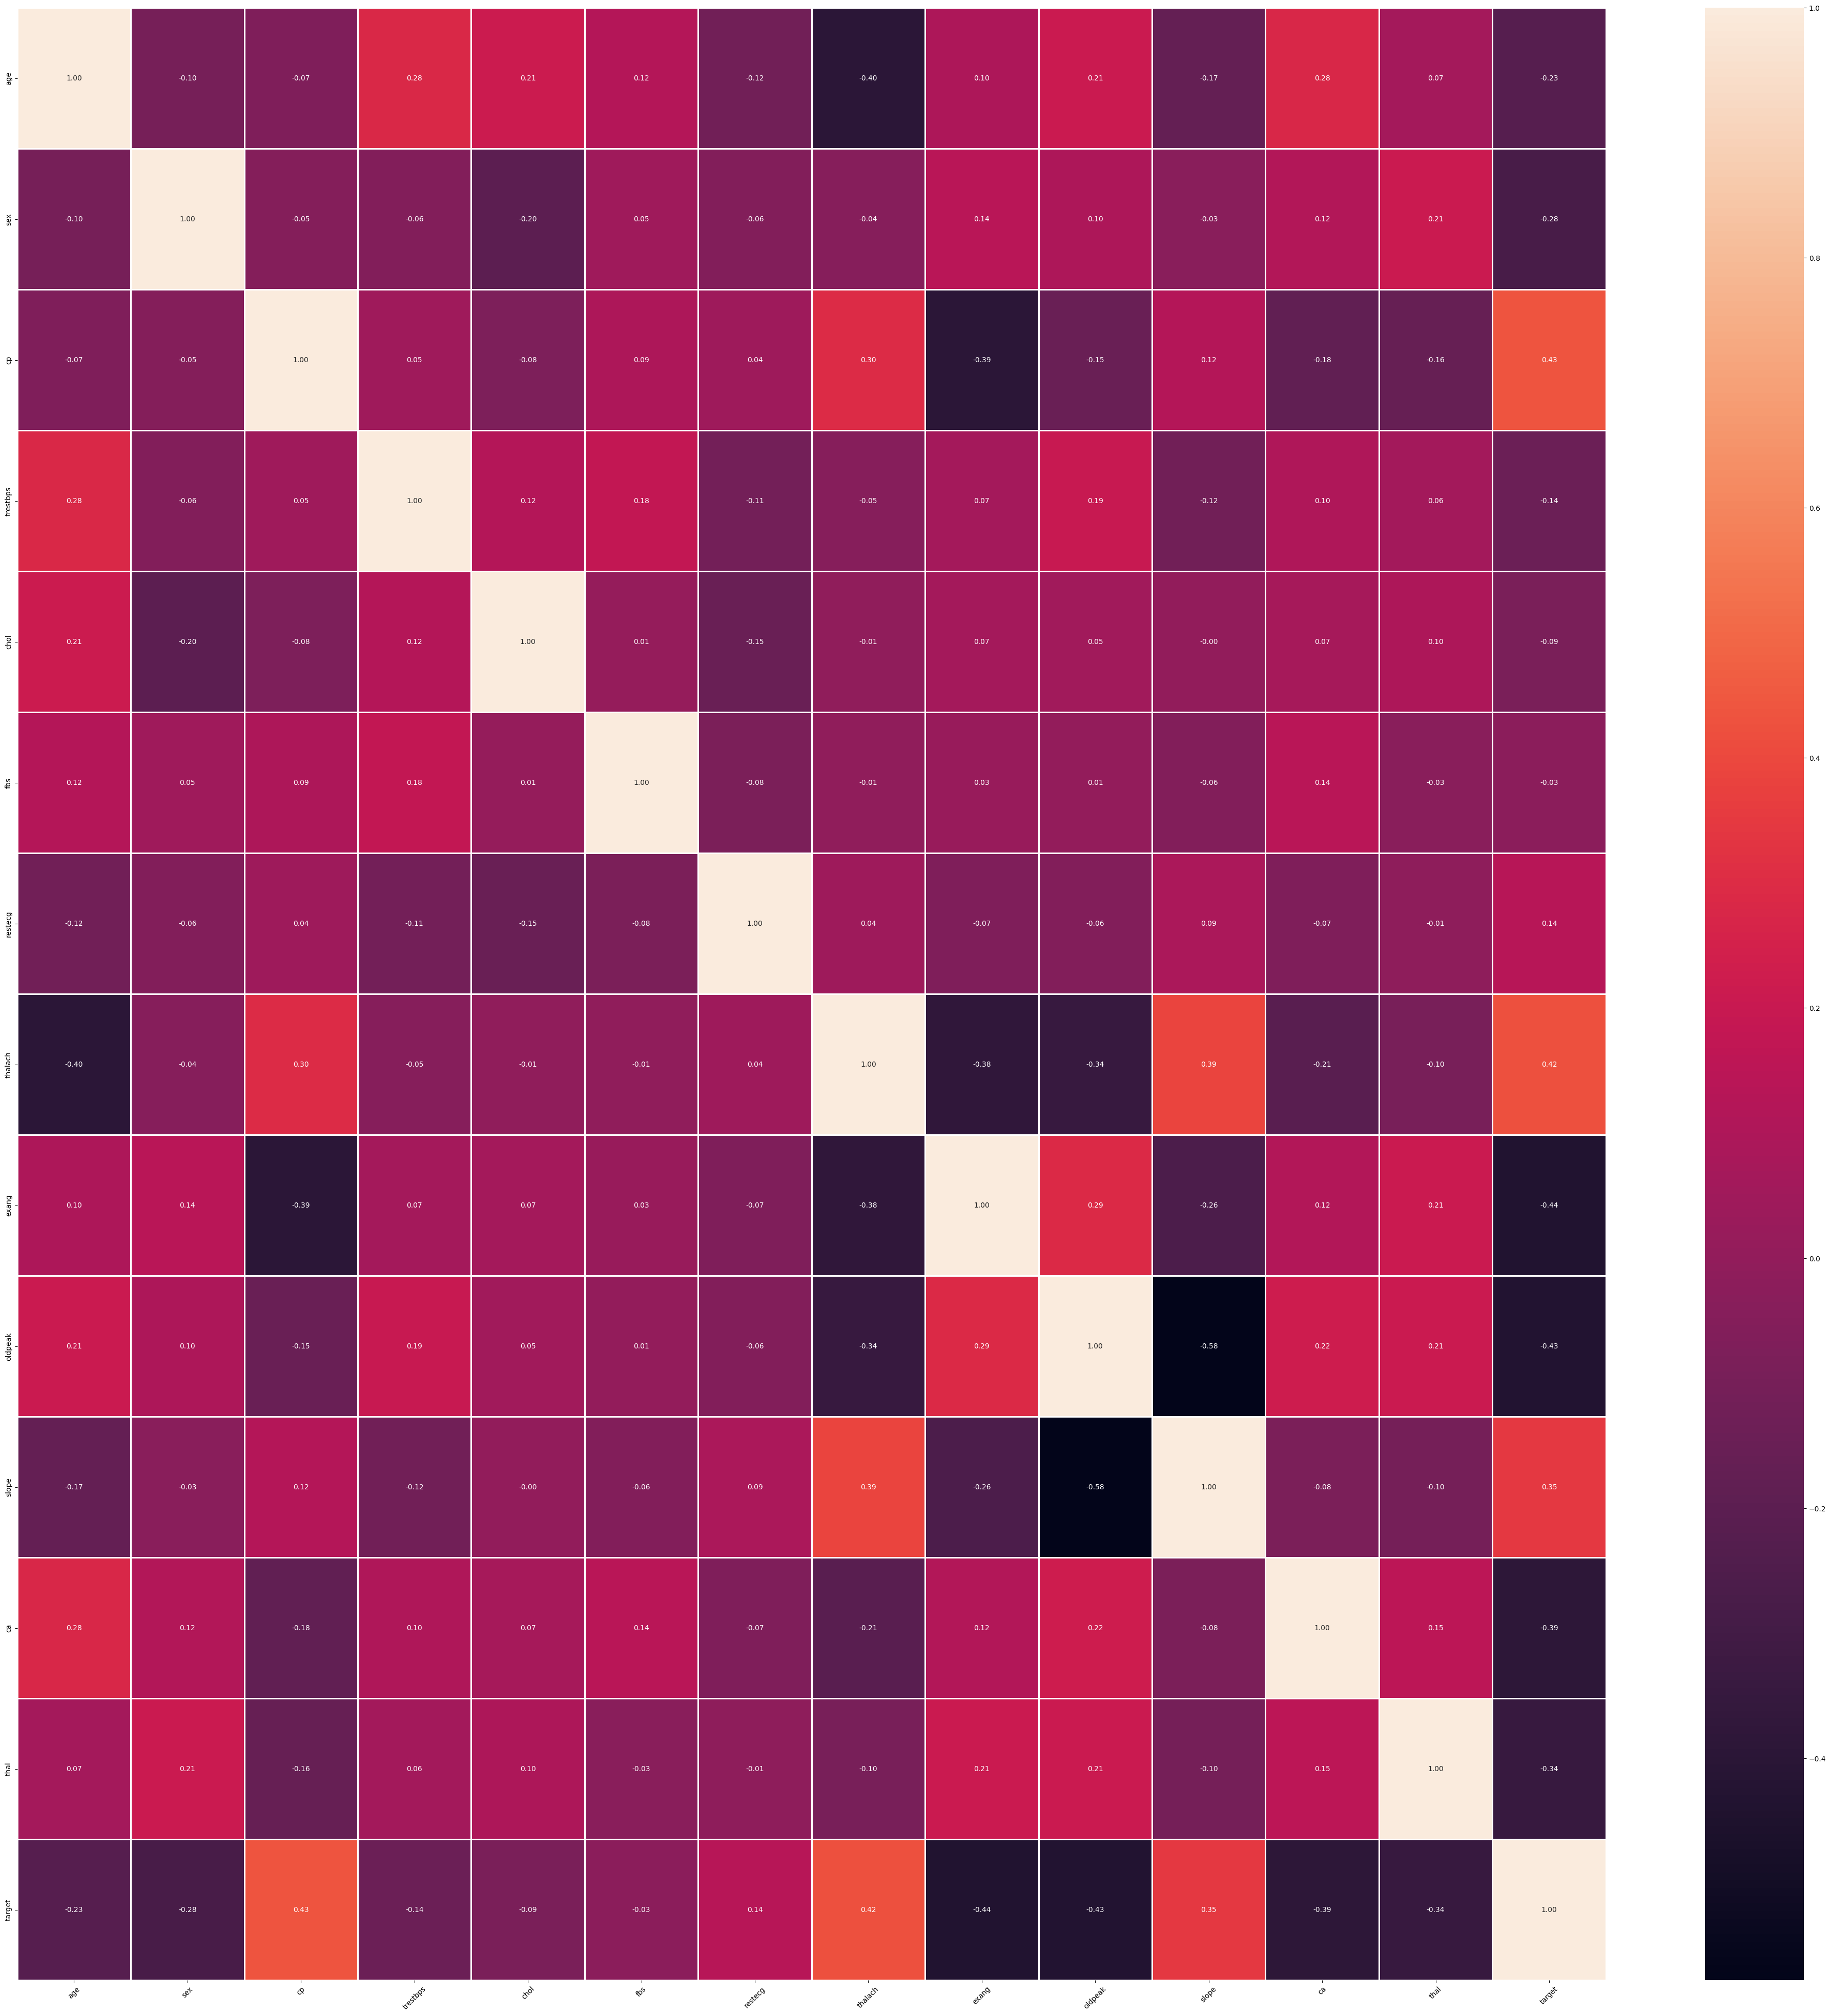

In [132]:
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

Now we need to split the dataset into target and training format.
- Target will have only target column
- Training data will have all the columns besides target column

In [133]:
df_input = pd.DataFrame(df.iloc[:, 0:13])

In [134]:
df_input.shape

(303, 13)

In [135]:
df_input

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [136]:
df_target = pd.DataFrame(df.iloc[:, 13],columns=['target'])

In [137]:
df_target.shape

(303, 1)

In [138]:
df_target

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Transforming the training data so it can be understood by the deep learning engine.

- StandardScaler removes the mean and scales the data to unit variance.

More info:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_input = scaler.fit_transform(df_input)

In [140]:
df_scaled_input

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])


- Splitting the dataset into two sets:
  - training set
  - testing set.
- Library Used:
   - scikit-learn library has been used with function sklearn.model_selection.train_test_split() function to split the source data

In [141]:
from sklearn.model_selection import train_test_split
df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df_scaled_input, df_target, test_size = 0.30, random_state = 5)
print("Training data Split (Train & Test)")
print(df_input_train.shape)
print(df_input_test.shape)

print("Target data Split (Train & Test)")
print(df_target_train.shape)
print(df_target_test.shape)

Training data Split (Train & Test)
(212, 13)
(91, 13)
Target data Split (Train & Test)
(212, 1)
(91, 1)


**Build the Keras classifier to predict the heart disease**

In [142]:
from keras.models import Sequential
from keras.layers import Dense

**Keras Settings:**

- In the first line, we se the model as Sequential.
- All Layers
  - Added 3 fully connected Dense layers, two hidden and one output.
  - All layers are from Dense class.
- First Layer (Dense(30, input_dim=13, activation='tanh'))
  - The first input layer has inout dimension as 13 for all 13 columns.
  - the activation function is tanh
- Second Layer (Dense(20, activation='tanh'))
  - It has 20 neurons and the tanh activation function.
- Output Layer (Dense(1, activation='sigmoid'))
  - Output layer has a single neuron (output)
  - The sigmoid activation function is selected for binary classification problems
  - Out target data is binay - Yes or No heart disease .


In [241]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

**Compile and fit Step:**

Compile function has 3 arguments:
- The adam optimizer: An algorithm for first-order gradient-based optimization.
- The binary_crossentropy loss function: logarithmic loss, which for a binary classification problem is defined in Keras as binary_crossentropy
- The accuracy metric: to evaluate the performance of your model during training and testing

Fit Function has the following parameters:
- epochs = 100

**Plotting Keras Model**
- https://keras.io/api/utils/model_plotting_utils/


In [242]:
!pip install keras

In [243]:
from keras.utils import plot_model

In [244]:
# from keras.utils.vis_utils import plot_model

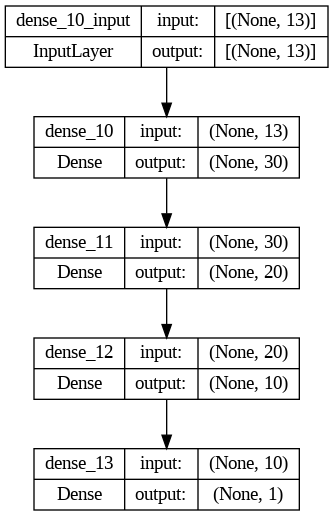

In [245]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [246]:
params = {"learning_rate": 0.001, "momentum": 0.5, "epochs": 150, "batch_size": 32, "optimizer": "Adam"}
run["parameters"] = params

In [ ]:
import tensorflow as tf

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate = params["learning_rate"],
)

In [ ]:
neptune_cbk = NeptuneCallback(run=run, base_namespace="training")

In [ ]:
for epoch in range(10):
    run["train/loss"].append(0.9 ** epoch)

run["eval/f1_score"] = 0.66

In [ ]:
model.compile(
    optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    df_input_train,
    df_target_train,
    epochs=params["epochs"],
    batch_size=params["batch_size"],
    callbacks=[neptune_cbk],
    verbose = 1
)

In [ ]:
eval_metrics = model.evaluate(df_input_test, df_target_test, verbose = 0)

In [ ]:
for j, metric in enumerate(eval_metrics):
  run["eval/{}".format(model.metrics_names[j])] = metric

In [ ]:
model.summary()
score = model.evaluate(df_input_test, df_target_test, verbose = 0)
print("model Accuracy = ", score[1])

In [ ]:
history

In [ ]:
history.history.keys()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

In [ ]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Accuracy', color="green")
plt.plot(epochs, loss, 'b', label='Loss', color="red")
plt.title('Accuracy & Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy & Loss')
plt.legend()


plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Target_Classification = model.predict(df_input_test)
Target_Classification = (Target_Classification > 0.5)





print(confusion_matrix(df_target_test, Target_Classification))

In [ ]:
import numpy as np
best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
print(best_model_accuracy)

In [ ]:
model.save('model/keras-heart-disease.h5')

In [ ]:
!ls -l model

In [ ]:
from tensorflow import keras

In [ ]:
model_x = keras.models.load_model('model/keras-heart-disease.h5')

In [ ]:
print(model_x.metrics[0])
print(model_x.metrics[1])

In [ ]:
model_x.summary()

In [ ]:
model_version["model"].upload('model/keras-heart-disease.h5')

In [ ]:
model_version.change_stage("staging")

In [ ]:
# help(model)

In [ ]:
# Log the model
run["model"].upload('model/keras-heart-disease.h5')

In [ ]:
# model['model'].upload('model/keras-heart-disease.bin')

In [ ]:
# model['model'].upload('model/keras-heart-disease.bin')

In [ ]:
!ls

In [ ]:
run["data/network_plot"].upload('model_plot.png')

In [ ]:
model_version.stop()

In [ ]:
run.stop()